In [1]:
import pdb
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
# Uses data set from Chapter 1 of Bishop, stored in file
# "curvefitting.txt".  They are 10 points drawn from (x, sin(2 pi x))
# with noise added (but I'm not sure how much.)

# If random is not False, it should be an integer, and instead of
# returning data from the file, we will generate a new random data set
# of that size, with 0 mean, 0.2 stdev Gaussian noise.

# if addOnes is true, return: n x 1 matrix X, n x 2 matrix F (with
# column of 1's added) and n x 1 matrix Y.

def getCurveData(addOnes = False, random = False):
    if random:
        X = np.matrix([[i / float(random)] for i in range(random + 1)])
        noise = np.random.normal(scale = 0.2, size = (random+1, 1))
        y = np.matrix([[np.sin(2 * np.pi * X[i,0])] for i in range(X.shape[0])]) + noise
    else:
        data = np.loadtxt('curvefitting.txt')
        X, y = np.matrix(data[0]).T, np.matrix(data[1]).T
    if addOnes:
        F = np.append(np.ones_like(X), X, 1)
        return X, F, y
    else:
        return X, y

In [3]:
X, y = getCurveData()

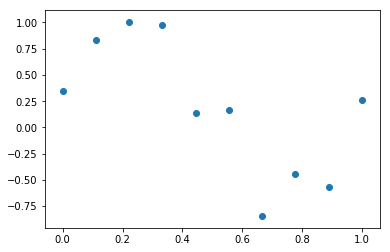

In [4]:
plt.scatter(X.A1, y.A1)

## Learning algorithms and helpers

### Ordinary least squares regression
$$
w=\left(X^{T} \cdot X\right)^{-1} X^{T} \cdot Y
$$

In [5]:
def ols_regression(X, y):
    """
    X: n x d matrix
    Y: n x 1 matrix
        Returns weights: d x 1 matrix
    """
    return (X.T * X).I * X.T * y

In [6]:
w = ols_regression(X, y)

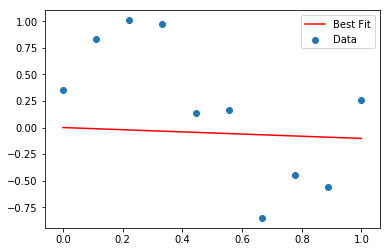

In [7]:
X_test = np.linspace(0, 1, 51)
y_pred = (w*X_test).A1

plt.plot(X_test, y_pred, c='r', label='Best Fit')
plt.scatter(X.A1, y.A1, label='Data')
plt.legend()
plt.show()